In [179]:
import os
import numpy as np
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget
import helpers as h
import matplotlib.pyplot as plt

In [239]:
bpath = "/Users/duuta/ppp/data/ibl/000017/sub-Cori/"
fpaths = os.listdir(bpath)

In [251]:
fpaths

['sub-Cori_ses-20161214T120000.nwb',
 'sub-Cori_ses-20161217T120000.nwb',
 'sub-Cori_ses-20161218T120000.nwb']

/Users/duuta/ppp/venv/lib/python3.9/site-packages/pynwb/base.py:193: UserWarning: IntervalSeries 'wheel_moves': Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warn("%s '%s': Length of data does not match length of timestamps. Your data may be transposed. "


Text(0, 0.5, 'Value of alpha')

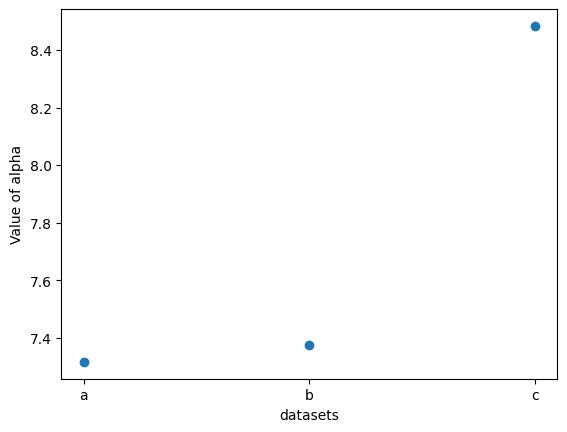

In [253]:
alist = []
means = []
for fpath in fpaths:
    _fpath = bpath+fpath
    with NWBHDF5IO(_fpath, mode='r') as io:
        nwbfile = io.read()
        dta0 = nwbfile.acquisition['lickPiezo'].data[()]
        n=dta0.shape[0]
        n1= int(n/500)
        data = dta0.reshape((500, n1))
        x = h.normalize_activity(data)
        mu_x = x.mean()
        means.append(mu_x)
        x = h.test_vars(x)
        y = h.get_alpha(x, np.arange(10, 5e2).astype(int))
        alist.append(y)
        

plt.plot(['a', 'b', 'c',], np.sort(alist), 'o');
plt.xlabel('datasets')
plt.ylabel('Value of alpha')
# add title and labels
# convert list to arr

(array([4.610400e+04, 1.138977e+06, 3.444990e+05, 2.870500e+04,
        1.943400e+04, 1.752300e+04, 1.982300e+04, 2.303400e+04,
        2.774700e+04, 3.389700e+04, 4.174700e+04, 4.970300e+04,
        4.391000e+04, 2.963900e+04, 9.958000e+03, 2.390000e+03,
        8.010000e+02, 3.790000e+02, 1.760000e+02, 5.400000e+01]),
 array([-2.84577566, -2.68239936, -2.51902306, -2.35564677, -2.19227047,
        -2.02889417, -1.86551787, -1.70214157, -1.53876527, -1.37538897,
        -1.21201267, -1.04863637, -0.88526007, -0.72188378, -0.55850748,
        -0.39513118, -0.23175488, -0.06837858,  0.09499772,  0.25837402,
         0.42175032]),
 <BarContainer object of 20 artists>)

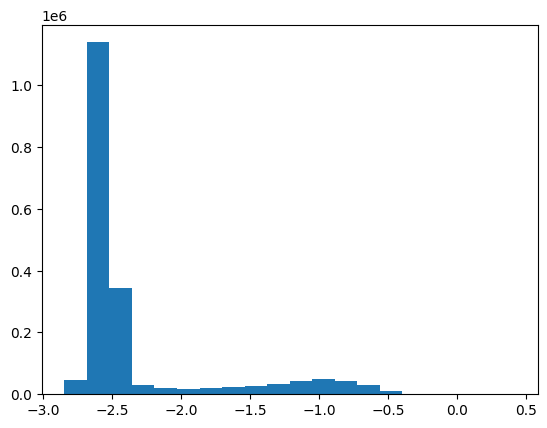

In [264]:
plt.hist(np.log10(data).flatten(),20)

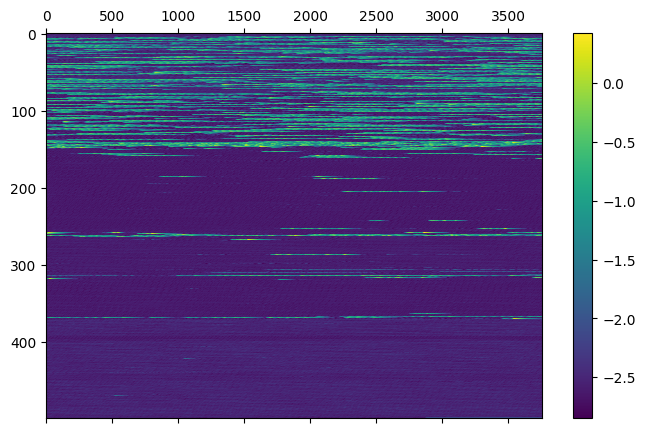

In [273]:
plt.figure(figsize=(8,5))
plt.matshow(np.log10(data), fignum=False);
plt.axis("auto")
plt.colorbar()

In [269]:
?plt.axis

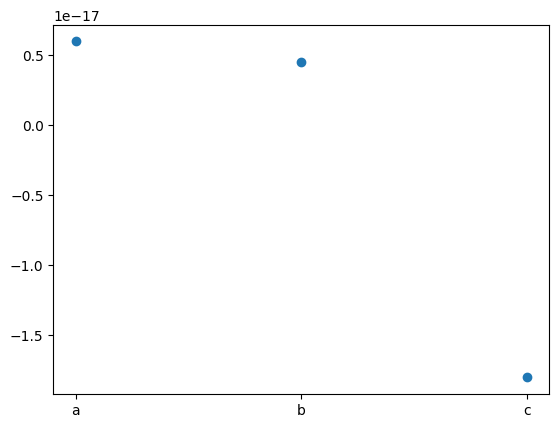

In [250]:
plt.plot(['a', 'b', 'c',], means, "o");

#check log plots etc... 
#

The mean 0.019156846834164798, sDeviation 0.05605253570473924


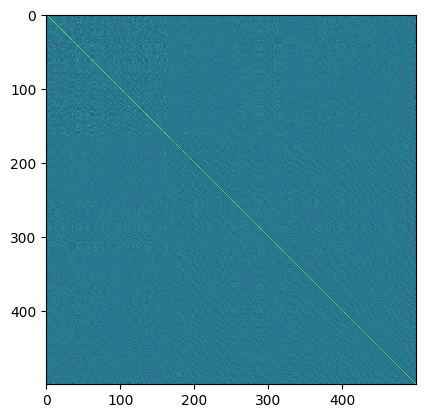

In [237]:
# diff stats same data
u = dta0.mean()
sd = dta0.std()
xx = dta0.reshape(500, 3757)
cor = np.corrcoef(xx)

print(F'The mean {u}, sDeviation {sd}')
plt.imshow(cor)

In [129]:
nwb2widget(nwbfile)

In [ ]:
# is there a normalization I am missing?>
# check if the dim of the variance depends on the shape of the matrix?
# it saturates changing from 1k * 1.3k to 1.3k * 1k gave 1k svd. 